In [2]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [140]:
## Libraries for Model Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
## Load the train and test data
trainD = p.read_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\train.csv", encoding="ISO-8859-1")
testD = p.read_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\test.csv", encoding="ISO-8859-1")

In [4]:
## Data Visualization
trainD.head(2)

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15


In [5]:
testD.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,60001,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000.0,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47
1,60002,21/03/16 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000.0,2,NaN,volkswagen,No,21/03/16 0:00,0,90762,23/03/16 2:50


In [51]:
# Print the information
print("Train\n=======================\n", trainD.info())
print("Test\n========================\n", testD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 20 columns):
x1     58857 non-null int64
x2     58857 non-null object
x3     58857 non-null object
x4     58857 non-null object
x5     58857 non-null object
y      58857 non-null int64
x6     57013 non-null object
x7     58857 non-null int64
x8     57138 non-null object
x9     58857 non-null int64
x10    58857 non-null object
x11    58857 non-null float64
x12    58857 non-null int64
x13    56772 non-null object
x14    58857 non-null object
x15    52008 non-null object
x16    58857 non-null object
x17    58857 non-null int64
x18    58857 non-null int64
x19    58857 non-null object
dtypes: float64(1), int64(7), object(12)
memory usage: 9.0+ MB
Train
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609 entries, 0 to 19608
Data columns (total 19 columns):
x1     19609 non-null int64
x2     19609 non-null object
x3     19609 non-null object
x4     19609 non-null object
x5     19609 non-n

In [7]:
## Print the unique values of each categorical column
cat_Columns = ["x3","x4", "x5", "x6", "x8", "x10", "x12", "x13", "x14", "x15"]
for col in cat_Columns:
    print([col], " : ", trainD[col].unique())

['x3']  :  ['Subaru_G3X_Justy_1.3'
 'Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline'
 'Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK__Navi_Leder' ...
 'Volkswagen_Scirocco_1.4_TSI_Edition'
 'T_5__Caravelle_/Kombi_8_sitzer_Klima_LANG'
 'Clio_3_zu_Verkaufen....schoenes_Auto']
['x4']  :  ['private']
['x5']  :  ['offer']
['x6']  :  ['Small Car' 'Combi' 'limousine' 'bus' 'coupe' 'suv' nan 'cabrio' 'Other']
['x8']  :  ['manual' 'automatic' nan]
['x10']  :  ['Other' 'passat' 'c_klasse' '147' 'a4' '5_reihe' '6er' 'a3' 'range_rover'
 'e_klasse' 'astra' 'vito' '3er' 'fortwo' 'laguna' 'avensis' 'polo'
 'sharan' '3_reihe' 'a_klasse' 'viano' 'b_max' 'cayenne' '1er' 'clio' 'sl'
 'focus' 'touran' 'primera' '5er' '156' 'one' 'q3' 'agila' 'vectra'
 'tucson' 'a6' 'golf' 'rav' 'fiesta' 'a5' 'corsa' 'ptcruiser' 'touareg'
 'transporter' 'g_klasse' 'm_klasse' 'boxster' 'punto' '7er' 'yaris'
 'matiz' 'pajero' 'aygo' 'vivaro' 'slk' 'scirocco' 'megane' 'lupo' 'ibiza'
 'cooper' 'jetta' 'kangoo' 'a8' 'tigra'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A675B55400>,
      dtype=object)

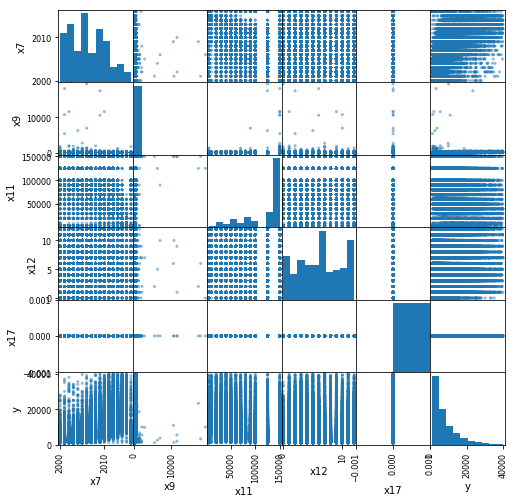

In [6]:
## Plot
%matplotlib inline
plot_Columns = ["x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x17", "y"]
p.plotting.scatter_matrix(trainD[plot_Columns], figsize=(8,8))

In [8]:
trainD.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
y         0
x6     1844
x7        0
x8     1719
x9        0
x10       0
x11       0
x12       0
x13    2085
x14       0
x15    6849
x16       0
x17       0
x18       0
x19       0
dtype: int64

In [9]:
testD.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6      636
x7        0
x8      505
x9        0
x10       0
x11       0
x12       0
x13     754
x14       0
x15    2249
x16       0
x17       0
x18       0
x19       0
dtype: int64

In [10]:
## View the models of car where the fuel type (x13)= NAN
trainD.sort_values(by=['y'])

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
31648,31649,12/03/16 21:56,Mercedes_Benz_A160_Benzin_Elegance,private,offer,1001,NaN,2000,manual,102,a_klasse,150000.0,3,petrol,mercedes_benz,No,12/03/16 0:00,0,73479,12/03/16 22:46
32411,32412,12/03/16 23:36,Mercedes_A_Klasse,private,offer,1001,NaN,2016,NaN,0,a_klasse,150000.0,9,NaN,mercedes_benz,NaN,12/03/16 0:00,0,36280,06/04/16 13:46
37075,37076,31/03/16 14:38,Ford_KA_Basis_SERVO/Technisch_Tip_/Top_/Sommer...,private,offer,1025,Small Car,2005,manual,60,ka,125000.0,12,petrol,ford,No,31/03/16 0:00,0,45896,31/03/16 14:38
47971,47972,12/03/16 9:55,Opel_Astra_1.6,private,offer,1049,NaN,2016,manual,0,corsa,150000.0,0,petrol,opel,NaN,12/03/16 0:00,0,53797,17/03/16 6:44
1465,1466,30/03/16 0:57,Daewoo_Lacetti_1.4_SE,private,offer,1049,limousine,2004,manual,95,Other,125000.0,4,petrol,daewoo,No,29/03/16 0:00,0,79856,04/04/16 18:16
10077,10078,14/03/16 14:54,Auto_Renault_Clio_bj_2002__1_5_D,private,offer,1050,Small Car,2002,manual,0,clio,150000.0,9,diesel,renault,No,14/03/16 0:00,0,34132,15/03/16 10:16
50985,50986,06/04/16 21:06,TÜV_bis_10/2017_Alufelgen_D3_Norm,private,offer,1050,Small Car,2001,NaN,50,lupo,150000.0,1,NaN,volkswagen,NaN,06/04/16 0:00,0,65719,06/04/16 21:06
22859,22860,02/04/16 8:25,Sparsamer_Opel_Corsa_aus_erster_Hand,private,offer,1050,Small Car,2000,manual,54,corsa,125000.0,3,petrol,opel,No,02/04/16 0:00,0,60311,05/04/16 17:26
7960,7961,05/03/16 14:08,Renault_Twingo_1.2_Bj.31.08.2004___Tuev_&_au_1...,private,offer,1050,Small Car,2004,manual,58,twingo,150000.0,8,petrol,renault,No,04/03/16 0:00,0,57518,11/03/16 8:16
23502,23503,30/03/16 17:58,Ford_KA_Basis_SERVO/Technisch_Tip_/Top_/Sommer...,private,offer,1050,Small Car,2005,manual,60,ka,125000.0,12,petrol,ford,No,30/03/16 0:00,0,45896,30/03/16 17:58


In [11]:
trainD[trainD["x8"].isna()]

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
86,87,01/04/16 21:50,Volkswagen_VW_T5_1.9_TDI_9_Sitze,private,offer,4000,bus,2003,NaN,0,transporter,150000.0,12,diesel,volkswagen,Yes,01/04/16 0:00,0,39106,01/04/16 21:50
112,113,28/03/16 20:39,Audi_A6_2.4,private,offer,3600,limousine,2001,NaN,170,a6,150000.0,9,petrol,audi,No,28/03/16 0:00,0,75015,07/04/16 2:46
158,159,01/04/16 10:50,Smart_451_Cabrio_+_8_Fach_+_Alu_+_wenig_Kilome...,private,offer,8900,cabrio,2013,NaN,0,fortwo,20000.0,5,petrol,smart,NaN,01/04/16 0:00,0,78224,07/04/16 7:46
184,185,22/03/16 11:59,318_Ci_Cabrio_M_PACKET_LPG_GAS_LEDER_NAVi_HART...,private,offer,9990,cabrio,2005,NaN,150,3er,150000.0,5,lpg,bmw,NaN,22/03/16 0:00,0,45770,06/04/16 0:16
238,239,27/03/16 15:53,Nissan_Primera_Traveller_2.0,private,offer,1450,Combi,2004,NaN,0,primera,150000.0,6,petrol,nissan,No,27/03/16 0:00,0,88250,27/03/16 16:45
247,248,11/03/16 16:57,320d_DPF_Touring,private,offer,3100,Combi,2007,NaN,0,3er,150000.0,11,diesel,bmw,No,11/03/16 0:00,0,22869,11/03/16 17:42
258,259,21/03/16 15:57,Ford_S_Max_2.0_TDCi_DPF_Titanium_7_SITZER,private,offer,8950,bus,2007,NaN,140,s_max,150000.0,9,diesel,ford,No,21/03/16 0:00,0,68305,25/03/16 13:15
277,278,12/03/16 14:50,Volkswagen_Caddy_2.0_TDI,private,offer,12450,Combi,2011,NaN,0,caddy,125000.0,3,diesel,volkswagen,No,12/03/16 0:00,0,35684,25/03/16 14:46
307,308,22/03/16 17:54,Verkaufe_Opel_Corsa_D,private,offer,5000,Small Car,2007,NaN,90,corsa,80000.0,5,petrol,opel,No,22/03/16 0:00,0,71131,06/04/16 9:17
310,311,29/03/16 20:43,Smart_ForTwo,private,offer,3250,Small Car,2007,NaN,0,fortwo,125000.0,10,petrol,smart,No,29/03/16 0:00,0,84028,06/04/16 6:45


In [12]:
## Just try with all bad data
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
import pandas_profiling as pp

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [14]:
pp.ProfileReport(trainD)

Number of variables,20
Number of observations,58857
Total Missing (%),1.1%
Total size in memory,9.0 MiB
Average record size in memory,160.0 B
Numeric,7
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [15]:
pp.ProfileReport(testD)

Number of variables,19
Number of observations,19609
Total Missing (%),1.1%
Total size in memory,2.8 MiB
Average record size in memory,152.0 B
Numeric,6
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [16]:
def dropCols(drop_Col_List, dF):
    return dF.drop(columns=drop_Col_List)
        

In [17]:
## Drop the following columns
## x2: Data Collected Date: has no business importance for predicting the price
## x4: Seller type same for al lthe records and hence gathers no importance for business (private)
## x5: Offer Type has only one value (offer) for al lrecords and hence removed considering of no impartance for prediction
## x12: Month of vehicle registration is removed conidering there is no correlation between the price and month of registration
## x16: Date of ad creation is not relevant
## x17: Number of pics: Though number of pics help a prospect buyer to make a decission to buy a car, it will not help in prediction or affect the price of hte car.
## x18: Zip code has no impact on price. May be if we are about to predict sale, zip code might be useful
## x19: Date of Ad Last seen - irrelevant
pp_TrainD = dropCols(['x12','x17', 'x4', 'x5', 'x2', 'x16', 'x18', 'x19'], trainD)
pp_TestD = dropCols(['x12','x17', 'x4', 'x5','x2', 'x16', 'x18', 'x19'], testD)


In [18]:
pp.ProfileReport(pp_TrainD)

Number of variables,12
Number of observations,58857
Total Missing (%),1.8%
Total size in memory,5.4 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [19]:
pp.ProfileReport(pp_TestD)

Number of variables,11
Number of observations,19609
Total Missing (%),1.9%
Total size in memory,1.6 MiB
Average record size in memory,88.0 B
Numeric,4
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [20]:
pp_TrainD.isna().sum()

x1        0
x3        0
y         0
x6     1844
x7        0
x8     1719
x9        0
x10       0
x11       0
x13    2085
x14       0
x15    6849
dtype: int64

In [21]:
pp_TestD.isna().sum()

x1        0
x3        0
x6      636
x7        0
x8      505
x9        0
x10       0
x11       0
x13     754
x14       0
x15    2249
dtype: int64

In [26]:
## Fetch all unique/ distinct values
cat_Columns = ["x3", "x6", "x7", "x8","x9","x10","x11",  "x13", "x14", "x15"]
for col in cat_Columns:
    try:
        print("Train:",[col], " : ", pp_TrainD[col].unique())
        print("Test:",[col], " : ", pp_TestD[col].unique())
    except KeyError:
        print("")
        pass


Train: ['x6']  :  ['Small Car' 'Combi' 'limousine' 'bus' 'coupe' 'suv' nan 'cabrio' 'Other']
Test: ['x6']  :  ['suv' 'Combi' 'bus' 'limousine' nan 'cabrio' 'Other' 'Small Car' 'coupe']
Train: ['x7']  :  [2004 2007 2005 2000 2003 2010 2013 2006 2002 2015 2014 2009 2008 2011
 2001 2016 2012]
Test: ['x7']  :  [2004 2011 2007 2002 2006 2016 2008 2003 2001 2000 2012 2009 2014 2010
 2015 2005 2013]
Train: ['x8']  :  ['manual' 'automatic' nan]
Test: ['x8']  :  ['automatic' 'manual' nan]
Train: ['x9']  :  [   94   140   150   200   129   131   146   333   122   272   116   163
   179   105   224   170    61   156    77   114   250     0   211    90
    98   125   143   177   115   101   340   204   218   231   155    58
   132   109   230   141   180   107   126   160    82    60   306   134
   220   260    69   174    75    68   295    81    50    71    86   203
   334    80    97   144   184   190    84   136   192    99    83    54
   363   100   110   145   241   124   258   310   120   1

In [23]:
## Drop x3: Nemae of vehichle. Only the brand and model has impact
pp_TrainD = dropCols(['x3'], pp_TrainD)
pp_TestD = dropCols(['x3'], pp_TestD)

In [31]:
## Check the powe of engine "0" values
pp_TrainD[pp_TrainD['x9']==0].head(5)

,x1,y,x6,x7,x8,x9,x10,x11,x13,x14,x15
28,29,1222,Combi,2001,manual,0,passat,150000.0,petrol,volkswagen,No
86,87,4000,bus,2003,NaN,0,transporter,150000.0,diesel,volkswagen,Yes
100,101,3200,Small Car,2010,manual,0,matiz,60000.0,petrol,chevrolet,No
109,110,10499,bus,2010,manual,0,vivaro,150000.0,diesel,opel,NaN
150,151,3000,limousine,2001,manual,0,3er,5000.0,diesel,bmw,NaN


In [32]:
## Check the powe of engine "0" values
print(pp_TrainD[pp_TrainD['x14']=="bmw"].head(5))
print(pp_TrainD[pp_TrainD['x14']=="volkswagen"].head(5))
print(pp_TrainD[pp_TrainD['x14']=="chevrolet"].head(5))

    x1      y         x6    x7         x8   x9  x10       x11     x13  x14  \
8    9  10900      coupe  2004  automatic  333  6er  150000.0  petrol  bmw   
16  17   2850  Small Car  2003     manual  116  3er  150000.0  petrol  bmw   
21  22   8200      Combi  2004     manual  170  3er   80000.0  petrol  bmw   
38  39   6000  limousine  2009  automatic  177  3er  125000.0  diesel  bmw   
39  40   2300        NaN  2016  automatic  115  3er  150000.0  petrol  bmw   

    x15  
8    No  
16  NaN  
21   No  
38   No  
39  NaN  
    x1     y     x6    x7         x8   x9     x10       x11     x13  \
1    2  5999  Combi  2007     manual  140  passat  150000.0  diesel   
6    7  4450  Combi  2003     manual  131  passat  150000.0  diesel   
25  26  3490  Combi  2003  automatic  114  passat  150000.0  diesel   
26  27  9500  Combi  2006  automatic  250  passat  150000.0  petrol   
28  29  1222  Combi  2001     manual    0  passat  150000.0  petrol   

           x14  x15  
1   volkswagen   No  


In [58]:
def setMode(x):
    try:
        m = x.mode()[0]
        ##print(m)
        return x.fillna(m)
    except KeyError:
        print("Exception occured")
        pass
    except IndexError:
        print("Index Error", IndexError.args)
        pass

In [42]:
## Fill the fuel type based on model and brand mode
##pp_TrainD['x13'] = pp_TrainD.groupby(['x14', 'x10'])['x13'].transform(lambda x: x.fillna(x.mode()[0]))
##pp_TestD['x13'] = pp_TestD.groupby(['x14', 'x10'])['x13'].transform(lambda x: x.fillna(x.mode()[0]))
pp_TrainD['x13'] = pp_TrainD.groupby(['x14', 'x10'])['x13'].transform(setMode)
pp_TestD['x13'] = pp_TestD.groupby(['x14', 'x10'])['x13'].transform(setMode)

petrol
petrol
petrol
diesel
petrol
petrol
diesel
Index Error <attribute 'args' of 'BaseException' objects>
petrol
petrol
petrol
diesel
diesel
diesel
diesel
diesel
diesel
diesel
diesel
petrol
petrol
petrol
diesel
petrol
diesel
diesel
electro
petrol
diesel
petrol
petrol
petrol
diesel
petrol
petrol
diesel
petrol
petrol
diesel
petrol
diesel
diesel
diesel
petrol
petrol
petrol
diesel
diesel
petrol
diesel
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
diesel
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
petrol
diesel
diesel
petrol
diesel
diesel
petrol
petrol
petrol
petrol
petrol
petrol
petrol
petrol
diesel
petrol
diesel
petrol
petrol
diesel
diesel
diesel
diesel
petrol
diesel
petrol
petrol
petrol
diesel
petrol
lpg
petrol
petrol
diesel
diesel
diesel
petrol
petrol
diesel
diesel
diesel
diesel
diesel
diesel
petrol
petrol
diesel
diesel
petrol
diesel
petrol
petrol
diesel
petrol
petrol

In [45]:
## Check isna
print("Train\n===========\n",pp_TrainD.isna().sum())
print("Test\n============\n",pp_TestD.isna().sum())

Train
 x1        0
y         0
x6     1844
x7        0
x8     1719
x9        0
x10       0
x11       0
x13       2
x14       0
x15    6849
dtype: int64
Test
 x1        0
x6      636
x7        0
x8      505
x9        0
x10       0
x11       0
x13       1
x14       0
x15    2249
dtype: int64


In [50]:
## Fetch the blanks left and validate
print("Train\n===============\n",pp_TrainD[pp_TrainD['x13'].isnull()])
print("Test\n================\n",pp_TestD[pp_TestD['x13'].isnull()])


Train
           x1     y   x6    x7      x8   x9     x10       x11  x13   x14  x15
39319  39320  5500  NaN  2016  manual  170      90  150000.0  NaN  audi   No
51101  51102  2500  NaN  2016  manual  150  kadett  100000.0  NaN  opel  NaN
Test
           x1   x6    x7      x8   x9      x10     x11  x13   x14  x15
18405  78406  NaN  2000  manual  136  calibra  5000.0  NaN  opel  NaN


In [55]:
## Since the transmission is manual, fill the nan fuel type with Diesel
##pp_TrainD['x13'] = pp_TrainD.apply(lambda x: x['x8']=='manual' if x['x13'].isnull() )

pp_TrainD.loc[(pp_TrainD['x13'].isnull()) & (pp_TrainD['x8']=="manual"), 'x13'] = "diesel"
pp_TestD.loc[(pp_TestD['x13'].isnull()) & (pp_TestD['x8']=="manual"), 'x13'] = "diesel"

In [57]:
## For transmission type, impute with mode based on the model and brand and fuel type
pp_TrainD['x8'] = pp_TrainD.groupby(['x14', 'x10', 'x13'])['x8'].transform(setMode)
pp_TestD['x8'] = pp_TestD.groupby(['x14', 'x10', 'x13'])['x8'].transform(setMode)

manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
automatic
automatic
manual
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
automatic
manual
automatic
automatic
automatic
automatic
automatic
automatic
automatic
manual
manual
automatic
automatic
automatic
automatic
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
automatic
manual
automatic
automatic
automatic
automatic
automatic
automatic
automatic
manual
automatic
Index Error <attribute 'args' of 'BaseException' objects>
manual
automatic
automatic
automatic
manual
automatic
automatic
automatic
manual
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
automatic
automatic
automatic
manual
automatic
automatic
manual
automatic
automatic
automatic
automatic
manual
manual
manual
automatic
automatic
automatic
manual
automatic
manual
manual
manual
manual
manual
manual
Index Error 

manual
manual
automatic
manual
automatic
automatic
automatic
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
automatic
automatic
manual
manual
automatic
automatic
manual
manual
automatic
Index Error <attribute 'args' of 'BaseException' objects>
automatic
automatic
automatic
manual
automatic
manual
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
automatic
automatic
automatic
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
manual
automatic
manual
manual
manual
manual
manual
manual
manual
manual
m

In [63]:
## Fetch the blanks left and validate
print("Train\n===============\n",pp_TrainD[pp_TrainD['x8'].isnull()])
print("Test\n================\n",pp_TestD[pp_TestD['x8'].isnull()])

Train
 Empty DataFrame
Columns: [x1, y, x6, x7, x8, x9, x10, x11, x13, x14, x15]
Index: []
Test
 Empty DataFrame
Columns: [x1, x6, x7, x8, x9, x10, x11, x13, x14, x15]
Index: []


In [61]:
## fill the remaining NAN removing x13
pp_TrainD['x8'] = pp_TrainD.groupby(['x14', 'x10'])['x8'].transform(setMode)
pp_TestD['x8'] = pp_TestD.groupby(['x14', 'x10'])['x8'].transform(setMode)

In [64]:
## impute teh vehichle type based on model and brand
pp_TrainD['x6'] = pp_TrainD.groupby(['x14', 'x10'])['x6'].transform(setMode)
pp_TestD['x6'] = pp_TestD.groupby(['x14', 'x10'])['x6'].transform(setMode)

Index Error <attribute 'args' of 'BaseException' objects>
Index Error <attribute 'args' of 'BaseException' objects>
Index Error <attribute 'args' of 'BaseException' objects>
Index Error <attribute 'args' of 'BaseException' objects>


In [65]:
## Fetch the blanks left and validate
print("Train\n===============\n",pp_TrainD[pp_TrainD['x6'].isnull()])
print("Test\n================\n",pp_TestD[pp_TestD['x6'].isnull()])

Train
           x1     y   x6    x7      x8   x9     x10       x11     x13  \
17229  17230  7499  NaN  2016  manual   34  kaefer  150000.0  petrol   
39319  39320  5500  NaN  2016  manual  170      90  150000.0  diesel   
41394  41395  2199  NaN  2000  manual   50  kaefer   90000.0  petrol   
51101  51102  2500  NaN  2016  manual  150  kadett  100000.0  diesel   

              x14  x15  
17229  volkswagen  NaN  
39319        audi   No  
41394  volkswagen   No  
51101        opel  NaN  
Test
           x1   x6    x7      x8   x9      x10     x11     x13   x14  x15
18405  78406  NaN  2000  manual  136  calibra  5000.0  diesel  opel  NaN


In [67]:
## for test purpose concat and check if the nan gets filled
pp_TrainD['DFType'] = "Train"
pp_TestD['DFType'] = "Test"

In [68]:
pp_FullD = p.concat([pp_TrainD, pp_TestD], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [70]:
pp_FullD['x6'] = pp_FullD.groupby(['x14', 'x10'])['x6'].transform(setMode)

Index Error <attribute 'args' of 'BaseException' objects>
Index Error <attribute 'args' of 'BaseException' objects>


In [74]:
## Fetch the blanks left and validate
print("FULL SET\n===============\n",pp_FullD[pp_FullD['x6'].isnull()])

FULL SET
 Empty DataFrame
Columns: [DFType, x1, x10, x11, x13, x14, x15, x6, x7, x8, x9, y]
Index: []


In [73]:
## fill with nan with just the brand mode
pp_FullD['x6'] = pp_FullD.groupby(['x14'])['x6'].transform(setMode)

In [78]:
## impute the is damage repaired.
## Since this column describes if there is a damagem then if the damage is repaired, a nan can be considered as "Y" which 
## means the car is in good condition. This field can have impact on pricing and will surely impact the prediction based upon 
## the user interpretation of the question
pp_FullD['x15'].fillna(value='Yes', inplace=True)

In [79]:
pp_FullD.isna().sum()

DFType        0
x1            0
x10           0
x11           0
x13           0
x14           0
x15           0
x6            0
x7            0
x8            0
x9            0
y         19609
dtype: int64

In [84]:
## display the category column
cat_PPColumns = pp_FullD.select_dtypes(exclude=[n.number]).columns
print(cat_Columns)

Index(['DFType', 'x10', 'x13', 'x14', 'x15', 'x6', 'x8'], dtype='object')


In [85]:
for col in cat_PPColumns:
    try:
        print("FULL:",[col], " : ", pp_FullD[col].unique())
    except KeyError:
        print("Key Error")
        pass

FULL: ['DFType']  :  ['Train' 'Test']
FULL: ['x10']  :  ['Other' 'passat' 'c_klasse' '147' 'a4' '5_reihe' '6er' 'a3' 'range_rover'
 'e_klasse' 'astra' 'vito' '3er' 'fortwo' 'laguna' 'avensis' 'polo'
 'sharan' '3_reihe' 'a_klasse' 'viano' 'b_max' 'cayenne' '1er' 'clio' 'sl'
 'focus' 'touran' 'primera' '5er' '156' 'one' 'q3' 'agila' 'vectra'
 'tucson' 'a6' 'golf' 'rav' 'fiesta' 'a5' 'corsa' 'ptcruiser' 'touareg'
 'transporter' 'g_klasse' 'm_klasse' 'boxster' 'punto' '7er' 'yaris'
 'matiz' 'pajero' 'aygo' 'vivaro' 'slk' 'scirocco' 'megane' 'lupo' 'ibiza'
 'cooper' 'jetta' 'kangoo' 'a8' 'tigra' 'bora' 'cl' '2_reihe' 'corolla'
 'carnival' 'defender' 'panda' 'q5' 'clk' 'i_reihe' 'jazz' 'fox' 'duster'
 'c_max' 'fabia' '500' 'up' 'berlingo' 'caddy' 'scenic' 'meriva' 'jimny'
 'zafira' 'c1' 'glk' 'cc' 'cuore' 's_max' 'a1' 'leon' 'carisma' 'espace'
 'sprinter' 'mustang' 'twingo' 'rio' 'roomster' 'octavia' 'omega'
 'insignia' '6_reihe' 'v70' 'cr_reihe' 'colt' 'sportage' 'mondeo'
 'mx_reihe' 'clubm

In [88]:
## Label Encode the Boolean (Y/N)only field
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [89]:
pp_FullD['x15'].value_counts()

No     64993
Yes    13473
Name: x15, dtype: int64

In [90]:
## Create the lael encoder object

bData = pp_FullD['x15']
le.fit(bData.values)
pp_FullD['x15'] = le.transform(pp_FullD['x15'])

In [91]:
## Verify the encoded values
pp_FullD['x15'].value_counts()
## count matches

0    64993
1    13473
Name: x15, dtype: int64

In [92]:
## Label encode tehe Transmission Type
pp_FullD['x8'].value_counts()

manual       58401
automatic    20065
Name: x8, dtype: int64

In [93]:
transData = pp_FullD['x8']
le.fit(transData.values)
pp_FullD['x8'] = le.transform(pp_FullD['x8'])

In [94]:
## Verify the encoded values
pp_FullD['x8'].value_counts()
## count matches

1    58401
0    20065
Name: x8, dtype: int64

In [103]:
## Onehot encode the rest of the columns
cat_Cols_OHE = list(pp_FullD.select_dtypes(exclude=[n.number]).columns)
cat_Cols_OHE.remove('DFType')
cat_Cols_OHE

['x10', 'x13', 'x14', 'x6']

In [109]:
## one Hoty Encode the columns obtained above
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [110]:
## OHE in action
for cols in cat_Cols_OHE:
    ohe_Data = p.get_dummies(pp_FullD[cols], prefix=cols)
    pp_FullD = p.concat([pp_FullD, ohe_Data], axis=1)
    
print(pp_FullD.head(2))
print(pp_FullD.columns)

  DFType  x1     x10       x11     x13         x14  x15         x6    x7  x8  \
0  Train   1   Other   50000.0  petrol      subaru    0  Small Car  2004   1   
1  Train   2  passat  150000.0  diesel  volkswagen    0      Combi  2007   1   

    ...    x14_volkswagen  x14_volvo  x6_Combi  x6_Other  x6_Small Car  \
0   ...                 0          0         0         0             1   
1   ...                 1          0         1         0             0   

   x6_bus  x6_cabrio  x6_coupe  x6_limousine  x6_suv  
0       0          0         0             0       0  
1       0          0         0             0       0  

[2 rows x 300 columns]
Index(['DFType', 'x1', 'x10', 'x11', 'x13', 'x14', 'x15', 'x6', 'x7', 'x8',
       ...
       'x14_volkswagen', 'x14_volvo', 'x6_Combi', 'x6_Other', 'x6_Small Car',
       'x6_bus', 'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv'],
      dtype='object', length=300)


In [111]:
## View a few data
pp_FullD.head(5)

,DFType,x1,x10,x11,x13,x14,x15,x6,x7,x8,...,x14_volkswagen,x14_volvo,x6_Combi,x6_Other,x6_Small Car,x6_bus,x6_cabrio,x6_coupe,x6_limousine,x6_suv
0,Train,1,Other,50000.0,petrol,subaru,0,Small Car,2004,1,...,0,0,0,0,1,0,0,0,0,0
1,Train,2,passat,150000.0,diesel,volkswagen,0,Combi,2007,1,...,1,0,1,0,0,0,0,0,0,0
2,Train,3,c_klasse,150000.0,diesel,mercedes_benz,0,limousine,2007,0,...,0,0,0,0,0,0,0,0,1,0
3,Train,4,147,150000.0,diesel,alfa_romeo,0,limousine,2005,1,...,0,0,0,0,0,0,0,0,1,0
4,Train,5,a4,125000.0,petrol,audi,0,Combi,2005,1,...,0,0,1,0,0,0,0,0,0,0


In [116]:
## Remove the columns that has the categorical value and that was one hot encoded
for del_Col in cat_Cols_OHE:
    pp_FullD = pp_FullD.drop([del_Col], axis=1)

pp_FullD.columns

Index(['DFType', 'x1', 'x11', 'x15', 'x7', 'x8', 'x9', 'y', 'x10_145',
       'x10_147',
       ...
       'x14_volkswagen', 'x14_volvo', 'x6_Combi', 'x6_Other', 'x6_Small Car',
       'x6_bus', 'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv'],
      dtype='object', length=296)

In [118]:
## split the total data into Train and Test
pp_ENC_TrainD = pp_FullD.loc[pp_FullD.DFType=="Train"]
pp_ENC_TestD = pp_FullD.loc[pp_FullD.DFType=="Test"]

In [119]:
pp_ENC_TrainD.isna().sum()

DFType               0
x1                   0
x11                  0
x15                  0
x7                   0
x8                   0
x9                   0
y                    0
x10_145              0
x10_147              0
x10_156              0
x10_159              0
x10_1_reihe          0
x10_1er              0
x10_2_reihe          0
x10_300c             0
x10_3_reihe          0
x10_3er              0
x10_4_reihe          0
x10_500              0
x10_5_reihe          0
x10_5er              0
x10_6_reihe          0
x10_6er              0
x10_7er              0
x10_80               0
x10_90               0
x10_911              0
x10_Other            0
x10_a1               0
                    ..
x14_lada             0
x14_lancia           0
x14_land_rover       0
x14_mazda            0
x14_mercedes_benz    0
x14_mini             0
x14_mitsubishi       0
x14_nissan           0
x14_opel             0
x14_peugeot          0
x14_porsche          0
x14_renault          0
x14_rover  

In [122]:
## Check the Train and Test Data
print("Train\n================\n",pp_ENC_TrainD.DFType.value_counts())
print("Test\n=================\n",pp_ENC_TestD.DFType.value_counts())

Train
 Train    58857
Name: DFType, dtype: int64
Test
 Test    19609
Name: DFType, dtype: int64


In [123]:
## Drop the DFType columns
pp_ENC_TestD = pp_ENC_TestD.drop(['DFType'], axis=1)
pp_ENC_TrainD = pp_ENC_TrainD.drop(['DFType'], axis=1)

In [125]:
## Adding a missed data process: Calculate age of car based on the year of vehicleregistration
pp_ENC_TrainD['CarAge'] = 2018 - pp_ENC_TrainD['x7']
pp_ENC_TestD['CarAge'] = 2018 - pp_ENC_TestD['x7']

In [127]:
pp_ENC_TrainD = pp_ENC_TrainD.drop(['x7'], axis=1)
pp_ENC_TestD = pp_ENC_TestD.drop(['x7'], axis=1)

In [129]:
## Save the modifed data to a csv File for future usage
pp_ENC_TrainD.to_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\train_ModelReady.csv", index=False)
pp_ENC_TestD.to_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\test_ModelReady.csv", index=False)

In [ ]:
## Finished Pre Processing

In [ ]:
## Model Train

In [133]:
X = pp_ENC_TrainD.drop(['x1','y'], axis=1)
Y = pp_ENC_TrainD['y']
print(X.shape)
print(Y.shape)

(58857, 293)
(58857,)


In [134]:
Y.head(2)

0    3850.0
1    5999.0
Name: y, dtype: float64

In [148]:
## split the train X data into train and test
from sklearn.model_selection import train_test_split
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [150]:
## Train for models to calculate performance
print(Xtrain.shape)
print(Ytrain.shape)

(47085, 293)
(47085,)


In [151]:
modelsArray = [
LinearRegression(),
Lasso(),
RandomForestRegressor(),
DecisionTreeRegressor(),
KNeighborsRegressor(),
AdaBoostRegressor(),
GradientBoostingRegressor(),
Ridge()
]

In [153]:
## MAPE for model error rate
MAPE_Cols = []

MAPE_compare = p.DataFrame(columns=MAPE_Cols)

row_index=0

for model in modelsArray:
    pred_Train = model.fit(Xtrain, Ytrain).predict(Xtrain)
    pred_Test = model.fit(Xtrain, Ytrain).predict(Xtest)
    MAPE_name = model.__class__.__name__
    MAPE_compare.loc[row_index, 'Model Name'] = MAPE_name
    MAPE_compare.loc[row_index, 'Train Err Data'] = n.mean(n.abs((Y_train-pred_Train)/ Y_train))*100
    MAPE_compare.loc[row_index, 'Test Err Data'] = n.mean(n.abs((Y_test-pred_Test)/ Y_test))*100
    row_index+=1
    

MAPE_compare.sort_values(by=['Test Err Data'], ascending=False, inplace=True)
MAPE_compare    


,Model Name,Train Err Data,Test Err Data
5,AdaBoostRegressor,144.521568,122.682896
1,Lasso,53.890722,55.102106
7,Ridge,53.524244,54.840873
0,LinearRegression,53.501281,54.836263
6,GradientBoostingRegressor,28.878773,28.720651
4,KNeighborsRegressor,22.742284,28.462654
3,DecisionTreeRegressor,7.247808,27.322152
2,RandomForestRegressor,12.843557,24.183335


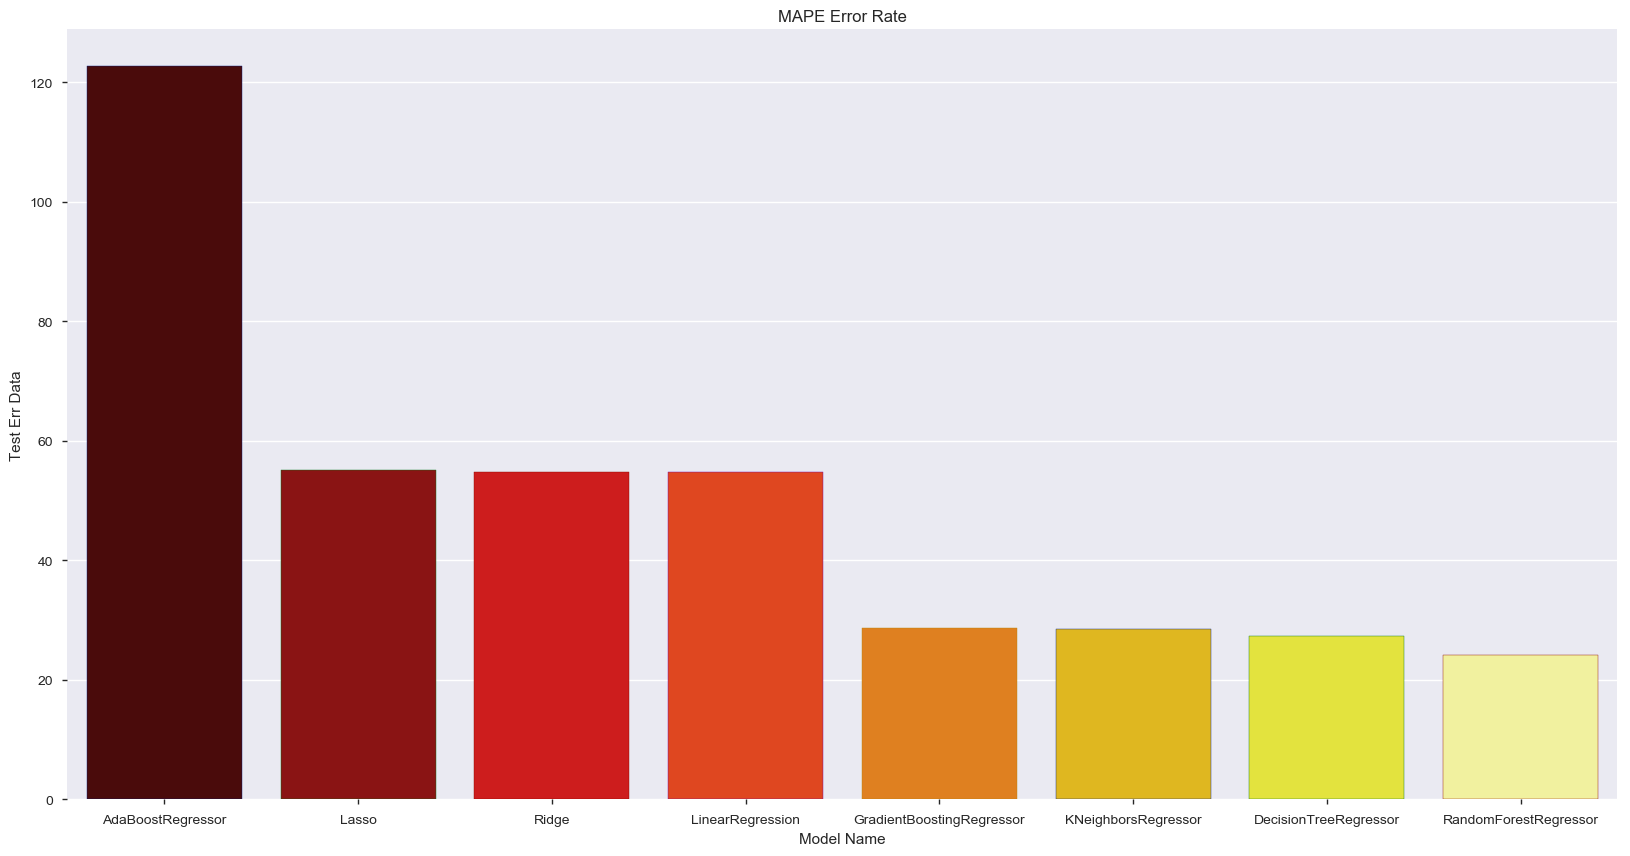

In [155]:
## plot the Test data error rate
plt.subplots(figsize=(20,10))
sb.barplot(x="Model Name", y="Test Err Data", data=MAPE_compare, palette='hot', edgecolor=sb.color_palette('dark', 5))
plt.title("MAPE Error Rate")
plt.show()

In [ ]:
## Random Forest Regressor, Decision Tree Regressor
## Picking Random Forest

In [165]:
RF = RandomForestRegressor(max_depth=50, n_estimators=500, random_state=42)
RF.fit(Xtrain, Ytrain)
predict_Test_RF = RF.predict(Xtest)
MAPE = n.mean(n.abs((Ytest-predict_Test_RF)/ Y_test))*100
print("MAPE SCORE", MAPE)

MAPE SCORE 23.558891599328295


In [167]:
sub_Data = pp_ENC_TestD['x1']
testD_To_Predict = pp_ENC_TestD.drop(['x1'], axis=1)
testD_To_Predict.isna().sum()

x11                      0
x15                      0
x8                       0
x9                       0
y                    19609
x10_145                  0
x10_147                  0
x10_156                  0
x10_159                  0
x10_1_reihe              0
x10_1er                  0
x10_2_reihe              0
x10_300c                 0
x10_3_reihe              0
x10_3er                  0
x10_4_reihe              0
x10_500                  0
x10_5_reihe              0
x10_5er                  0
x10_6_reihe              0
x10_6er                  0
x10_7er                  0
x10_80                   0
x10_90                   0
x10_911                  0
x10_Other                0
x10_a1                   0
x10_a2                   0
x10_a3                   0
x10_a4                   0
                     ...  
x14_lancia               0
x14_land_rover           0
x14_mazda                0
x14_mercedes_benz        0
x14_mini                 0
x14_mitsubishi           0
x

In [168]:
testD_To_Predict= testD_To_Predict.drop(['y'], axis=1)

In [169]:
testD_To_Predict['PredictedPrice'] = RF.predict(testD_To_Predict)

In [171]:
sub_Data.head(5)

0    60001
1    60002
2    60003
3    60004
4    60005
Name: x1, dtype: int64

In [194]:
predicted_Data_Res = p.concat([sub_Data,testD_To_Predict], axis=1)

In [195]:
predicted_DF = p.DataFrame(predicted_Data_Res)

In [196]:
predicted_DF.head(5)

,x1,x11,x15,x8,x9,x10_145,x10_147,x10_156,x10_159,x10_1_reihe,...,x6_Combi,x6_Other,x6_Small Car,x6_bus,x6_cabrio,x6_coupe,x6_limousine,x6_suv,CarAge,PredictedPrice
0,60001,125000.0,1,0,163,0,0,0,0,0,...,0,0,0,0,0,0,0,1,14,6146.286200
1,60002,150000.0,0,1,131,0,0,0,0,0,...,1,0,0,0,0,0,0,0,14,3839.480386
2,60003,70000.0,0,1,190,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7,17560.204214
3,60004,150000.0,0,1,136,0,0,0,0,0,...,0,0,0,1,0,0,0,0,11,5015.714883
4,60005,150000.0,1,0,193,0,0,0,0,0,...,1,0,0,0,0,0,0,0,16,3927.041676


In [197]:
predicted_DF.columns

Index(['x1', 'x11', 'x15', 'x8', 'x9', 'x10_145', 'x10_147', 'x10_156',
       'x10_159', 'x10_1_reihe',
       ...
       'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_bus', 'x6_cabrio',
       'x6_coupe', 'x6_limousine', 'x6_suv', 'CarAge', 'PredictedPrice'],
      dtype='object', length=295)

In [198]:
predicted_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19609 entries, 0 to 19608
Columns: 295 entries, x1 to PredictedPrice
dtypes: float64(2), int64(5), uint8(288)
memory usage: 7.2 MB


In [200]:
predicted_DF.loc[['x1', 'PredictedPrice']]

KeyError: "None of [['x1', 'PredictedPrice']] are in the [index]"

In [202]:
predicted_DF.to_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\PredictedData.csv", index=False, encoding="ISO-8859-1")

In [204]:
submission_FileData = p.read_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\PredictedData.csv", encoding="ISO-8859-1")

In [208]:
submission_FileData.columns

Index(['x1', 'x11', 'x15', 'x8', 'x9', 'x10_145', 'x10_147', 'x10_156',
       'x10_159', 'x10_1_reihe',
       ...
       'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_bus', 'x6_cabrio',
       'x6_coupe', 'x6_limousine', 'x6_suv', 'CarAge', 'PredictedPrice'],
      dtype='object', length=295)

In [215]:
submission_FileData.loc[:, ['x1','PredictedPrice']]

,x1,PredictedPrice
0,60001,6146.286200
1,60002,3839.480386
2,60003,17560.204214
3,60004,5015.714883
4,60005,3927.041676
5,60006,10697.881957
6,60007,6449.679667
7,60008,8219.189667
8,60009,19707.280000
9,60010,9379.483679


In [217]:
##Save the prediction
sel_Sub_Cols = submission_FileData.loc[:, ['x1','PredictedPrice']]

In [218]:
sel_Sub_Cols.to_csv("D:\\VinoPersonal\\BigDataClass\\DataScience\\Hackathon\\PredictCar\\PredictedData_TwoCols.csv", index=False, encoding="ISO-8859-1")